## Session2. Generate single cell feature matrix

### All commands are intended for a Linux environment.
If you're using Windows or macOS, please access a Linux server or set up a virtual machine

### Purpose of cellranger-arc count
- Aligns sequencing reads (GEX + ATAC) to the reference genome
- Quantifies gene expression and chromatin accessibility
- Generates a single-cell feature matrix for both modalities
- Produces outputs compatible with downstream tools like Seurat, Signac, or ArchR

cellranger-arc count is a command-line tool developed by 10x Genomics for processing multiome (scRNA-seq + scATAC-seq) data generated with the Chromium Single Cell Multiome platform. This step produces gene expression and chromatin accessibility data aligned to a reference genome.


### Step1. Downloading Inputs & Installing cellranger-arc 

### Step1-1. Downloading fastq files

##### Download fastq and csv files 
##### (The dataset is large (over 100GB). Please ensure you have sufficient disk space before attempting to retrieve the full dataset!!!!)


wget https://s3-us-west-2.amazonaws.com/10x.files/samples/cell-arc/2.0.0/pbmc_unsorted_10k/pbmc_unsorted_10k_fastqs.tar

wget https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_unsorted_10k/pbmc_unsorted_10k_library.csv


##### List files in data directory

In [2]:
ls

02.workshop_session.ipynb
10k_PBMC_Multiome_nextgem_Chromium_Controller_fastqs.tar
pbmc_unsorted_10k_fastqs.tar


##### Unpack the TAR archive to retrieve the dataset files

In [3]:
tar -xf pbmc_unsorted_10k_fastqs.tar

In [5]:
tar -xf 10k_PBMC_Multiome_nextgem_Chromium_Controller_fastqs.tar

##### List files and folders in data directory

In [2]:
ls

02.workshop_session.ipynb
10k_PBMC_Multiome_nextgem_Chromium_Controller_fastqs
10k_PBMC_Multiome_nextgem_Chromium_Controller_fastqs.tar
pbmc_unsorted_10k
pbmc_unsorted_10k_fastqs.tar


##### Change Working Directory

In [3]:
cd pbmc_unsorted_10k

In [5]:
# List files and folders in data directory
ls

atac  gex


In [6]:
cd atac

##### List all ATAC-seq FASTQ files located in the atac directory

In [7]:
ls

pbmc_unsorted_10k_S7_L001_I1_001.fastq.gz
pbmc_unsorted_10k_S7_L001_R1_001.fastq.gz
pbmc_unsorted_10k_S7_L001_R2_001.fastq.gz
pbmc_unsorted_10k_S7_L001_R3_001.fastq.gz
pbmc_unsorted_10k_S7_L002_I1_001.fastq.gz
pbmc_unsorted_10k_S7_L002_R1_001.fastq.gz
pbmc_unsorted_10k_S7_L002_R2_001.fastq.gz
pbmc_unsorted_10k_S7_L002_R3_001.fastq.gz
pbmc_unsorted_10k_S7_L003_I1_001.fastq.gz
pbmc_unsorted_10k_S7_L003_R1_001.fastq.gz
pbmc_unsorted_10k_S7_L003_R2_001.fastq.gz
pbmc_unsorted_10k_S7_L003_R3_001.fastq.gz
pbmc_unsorted_10k_S7_L004_I1_001.fastq.gz
pbmc_unsorted_10k_S7_L004_R1_001.fastq.gz
pbmc_unsorted_10k_S7_L004_R2_001.fastq.gz
pbmc_unsorted_10k_S7_L004_R3_001.fastq.gz


In [8]:
cd ..
cd gex

##### List all RNA-seq FASTQ files located in the gex directory

In [9]:
ls

pbmc_unsorted_10k_S1_L003_I1_001.fastq.gz
pbmc_unsorted_10k_S1_L003_I2_001.fastq.gz
pbmc_unsorted_10k_S1_L003_R1_001.fastq.gz
pbmc_unsorted_10k_S1_L003_R2_001.fastq.gz
pbmc_unsorted_10k_S1_L004_I1_001.fastq.gz
pbmc_unsorted_10k_S1_L004_I2_001.fastq.gz
pbmc_unsorted_10k_S1_L004_R1_001.fastq.gz
pbmc_unsorted_10k_S1_L004_R2_001.fastq.gz


In [10]:
cd ../..

In [11]:
ls

02.workshop_session.ipynb
10k_PBMC_Multiome_nextgem_Chromium_Controller_fastqs
10k_PBMC_Multiome_nextgem_Chromium_Controller_fastqs.tar
pbmc_unsorted_10k
pbmc_unsorted_10k_fastqs.tar


### Step1-2. Installing cellranger-arc 

wget -O cellranger-arc-2.0.2.tar.gz "https://cf.10xgenomics.com/releases/cell-arc/cellranger-arc-2.0.2.tar.gz?Expires=1747986817&Key-Pair-Id=APKAI7S6A5RYOXBWRPDA&Signature=kUY12F2QnsCeSjyqQHRK3p3RI7YfZrCFPbb7tLyul4LW0dq-6RARI~kEDdm7Q9pqEWnESLaWmGWsk2fFFyUS-FtqlPvKiD-w9KRGu68rUN~Vy~criRJcY9hG5bmTOu00~z9gPEBNrKYA-UOYpbj2U8RI0sYPgshSOjG4ifUKC~t2S0G3sfOjtJpSm35Fm0vve0xVrfBtr85PHoT24z8f5XVrxtygjxLQmSj2HXE3LMwtuqS6KKfPDjyfmyM~-vVzv7fYI0PJlgS8NSMVsHldDaGhMAztWb6bCXKkthrOE1Ywt9rYQnMwGQ1Q6Hf~yGsDSKaLCsy4VvT5LcKVXjfaDw__"

wget "https://cf.10xgenomics.com/supp/cell-arc/refdata-cellranger-arc-GRCh38-2024-A.tar.gz"


##### Unpack the TAR archive

tar -xzf cellranger-arc-2.0.2.tar.gz
tar -xzf refdata-cellranger-arc-GRCh38-2024-A.tar.gz 

In [14]:
# List files and folders in the directory
ls

02.workshop_session.ipynb
10k_PBMC_Multiome_nextgem_Chromium_Controller_fastqs
10k_PBMC_Multiome_nextgem_Chromium_Controller_fastqs.tar
cellranger-arc-2.0.2
cellranger-arc-2.0.2.tar.gz
pbmc_unsorted_10k
pbmc_unsorted_10k_fastqs.tar
refdata-cellranger-arc-GRCh38-2024-A
refdata-cellranger-arc-GRCh38-2024-A.tar.gz


In [15]:
cd cellranger-arc-2.0.2

In [16]:
ls

LICENSE  builtwith.json  external  mro            sourceme.csh
bin      cellranger-arc  lib       sourceme.bash


In [17]:
cd ..

### Step2. Create a libraries CSV file

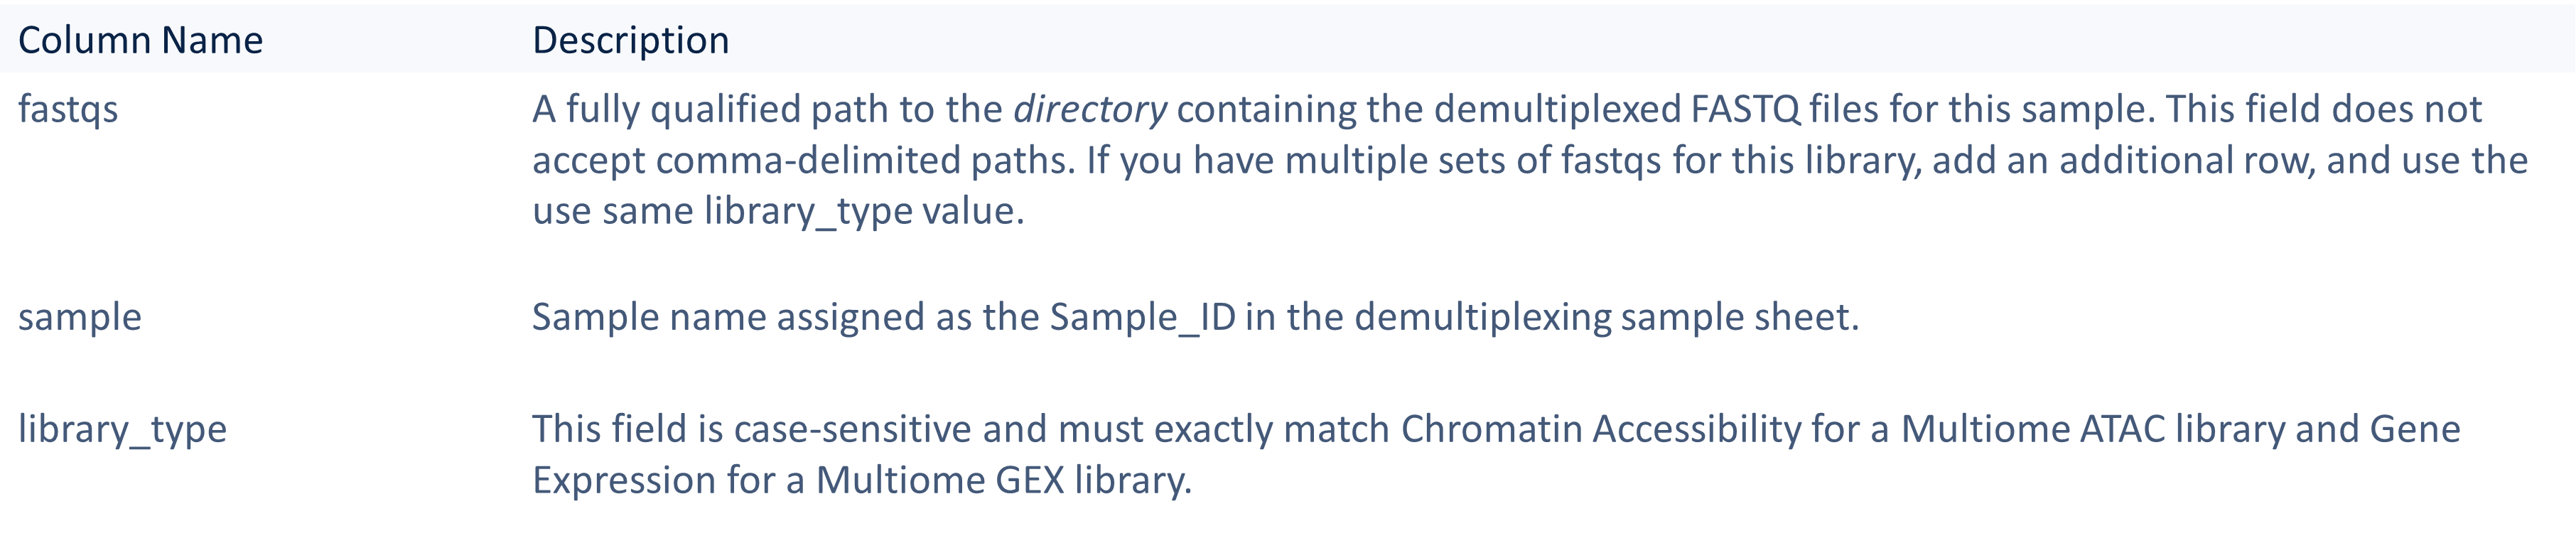

##### Check library file from Cell ranger

In [19]:
cat pbmc_unsorted_10k_library.csv

fastqs,sample,library_type
/path/to/fastqs/pbmc_unsorted_10k/gex,pbmc_unsorted_10k,Gene Expression
/path/to/fastqs/pbmc_unsorted_10k/atac,pbmc_unsorted_10k,Chromatin Accessibility


##### Print curent working directory

In [20]:
pwd

/lab-share/Neph-Lee-e2/Public/gkim/workshop/raw_data


In [25]:
ls 

02.workshop_session.ipynb
10k_PBMC_Multiome_nextgem_Chromium_Controller_fastqs
10k_PBMC_Multiome_nextgem_Chromium_Controller_fastqs.tar
cellranger-arc-2.0.2
cellranger-arc-2.0.2.tar.gz
pbmc_unsorted_10k
pbmc_unsorted_10k_fastqs.tar
pbmc_unsorted_10k_library.csv
pbmc_unsorted_10k_library.csve
refdata-cellranger-arc-GRCh38-2024-A
refdata-cellranger-arc-GRCh38-2024-A.tar.gz


##### Update the file path to match the correct FASTQ directory on your local system

##### To perform a find-and-replace operation within a file using sed, use the following format:
- command: sed -ie 's/[original_pattern]/[replacement_pattern]/' file_name
- pattern: If your pattern contains a forward slash /, you must escape it with a backslash \.

In [23]:
sed -ie 's/\/path\/to\/fastqs/\/lab-share\/Neph-Lee-e2\/Public\/gkim\/workshop\/raw_data/' pbmc_unsorted_10k_library.csv

##### Check that each path listed in the libraries.csv file matches the actual location of your FASTQ files

In [24]:
cat pbmc_unsorted_10k_library.csv

fastqs,sample,library_type
/lab-share/Neph-Lee-e2/Public/gkim/workshop/raw_data/pbmc_unsorted_10k/gex,pbmc_unsorted_10k,Gene Expression
/lab-share/Neph-Lee-e2/Public/gkim/workshop/raw_data/pbmc_unsorted_10k/atac,pbmc_unsorted_10k,Chromatin Accessibility


### Step3. Run cellranger-arc count

In [ ]:
cellranger-arc-2.0.2/cellranger-arc count \
                       --id=example_1 \
                       --reference=refdata-cellranger-arc-GRCh38-2024-A \
                       --libraries=pbmc_unsorted_10k_library.csv

